# Import Necessary Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Load Data from CSV

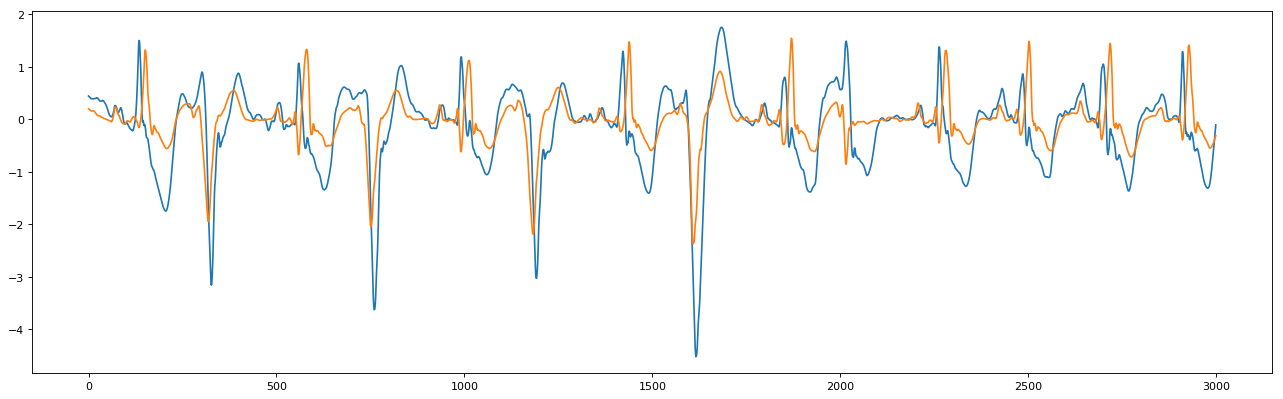

In [4]:
SUP = ['800', '801', '802', '803', '804', '805', '806', '807', '808', '809', '810', '811', '812', '820', '821', 
       '822', '823', '824', '825', '826', '827', '828', '829', '840', '841', '842', '843', '844', '845', '846', 
       '847', '848', '849', '850']


SUPSet_leads = {}
SUPSet_anns = {}
for ds in SUP:
    SUPSet_leads[ds] = pd.read_csv('Cleaned SUP/' + ds + '_lead.csv')
    SUPSet_anns[ds] = pd.read_csv('Cleaned SUP/' + ds + '_ann.csv')

# 测试读取情况
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(SUPSet_leads['801'][:3000])
plt.show()

# Heartbeat Annotation

In [5]:
N = ['N', 'L', 'R', 'e', 'j']
SVEB = ['A', 'a', 'J', 'S']
VEB = ['V', 'E']
F = ['F']
Q = ['P', 'f', 'U']
Non_beat_anns = ['[', ']', '!', 'x', '(', ')', 'p', 't', 'u', '`', '~', '^', '|', '+', 's', 'T', '*', 'D', '=', '"', '@']

# Heatbeat Segmentation

For each heartbeat knowing the R location, we take samples from the interval of 250 ms before R peak and 400 ms after R peak, i.e. total 0.65 s of each heartbeat. That is, 90 samples before R peak and 144 samples after R peak.

In [6]:
Hbs = {}
for ds in SUP:
    lead0 = SUPSet_leads[ds]['lead0']
    lead1 = SUPSet_leads[ds]['lead1']
    hbs0 = []
    hbs1 = []
    anns = []
    annIdxs = []
    for row in SUPSet_anns[ds].itertuples():
        if row[2] in Non_beat_anns:
            continue
        elif row[1] < 91:
            continue
        elif row[1] + 144 > len(lead0):
            continue
        else:
            anns.append(row[2])
            annIdxs.append(row[1] - 1)
            hbs0.append(lead0[row[1] - 91: row[1] + 144])
            hbs1.append(lead1[row[1] - 91: row[1] + 144])
    Hbs[ds] = pd.DataFrame({'lead0': hbs0, 'lead1': hbs1, 'ann': anns, 'annIdx': annIdxs})

In [7]:
Hbs['801'].head(10)

,ann,annIdx,lead0,lead1
0,N,127,37 0.361539 38 0.362331 39 0.35825...,37 0.032312 38 0.028525 39 0.02502...
1,V,312,222 -0.935055 223 -0.851771 224 -0.76691...,222 -0.381701 223 -0.353550 224 -0.32232...
2,N,549,459 0.051090 460 0.034578 461 0.01473...,459 -0.014701 460 -0.012392 461 -0.00926...
3,V,747,657 0.137190 658 0.175909 659 0.21499...,657 -0.233746 658 -0.215173 659 -0.19448...
4,N,987,897 -0.013025 898 -0.011139 899 -0.00...,897 0.021501 898 0.020361 899 0.01...
5,V,1176,1086 -0.026338 1087 0.027964 1088 0.07...,1086 -0.261736 1087 -0.237540 1088 -0.21...
6,N,1414,1324 0.009298 1325 -0.017138 1326 -0.02...,1324 -0.007747 1325 -0.008663 1326 -0.00...
7,V,1603,1513 -0.062690 1514 0.001104 1515 0.06...,1513 -0.337005 1514 -0.309591 1515 -0.28...
8,N,1841,1751 -0.030690 1752 -0.035435 1753 -0.04...,1751 0.046725 1752 0.041429 1753 0.03...
9,V,2011,1921 -1.381479 1922 -1.374591 1923 -1.36...,1921 -0.575295 1922 -0.583054 1923 -0.59...


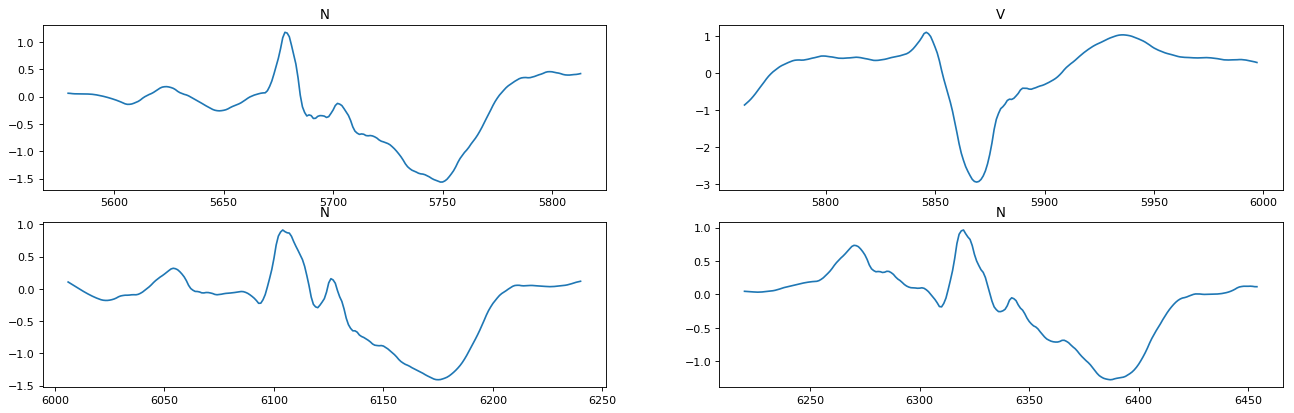

In [8]:
hb_num = 26
hb_set = '801'
plt.figure(figsize=(20, 6), dpi=80)
p1 = plt.subplot(221)
p1.plot(Hbs[hb_set]['lead0'][hb_num])
p1.set_title(Hbs[hb_set]['ann'][hb_num])
p2 = plt.subplot(222)
p2.plot(Hbs[hb_set]['lead0'][hb_num+1])
p2.set_title(Hbs[hb_set]['ann'][hb_num+1])
p3 = plt.subplot(223)
p3.plot(Hbs[hb_set]['lead0'][hb_num+2])
p3.set_title(Hbs[hb_set]['ann'][hb_num+2])
p4 = plt.subplot(224)
p4.plot(Hbs[hb_set]['lead0'][hb_num+3])
p4.set_title(Hbs[hb_set]['ann'][hb_num+3])
plt.show()

# Checking Overall Distribution of Lead0 and Lead1

ann:  {'V', 'N'}
Heartbeats amount:  1670


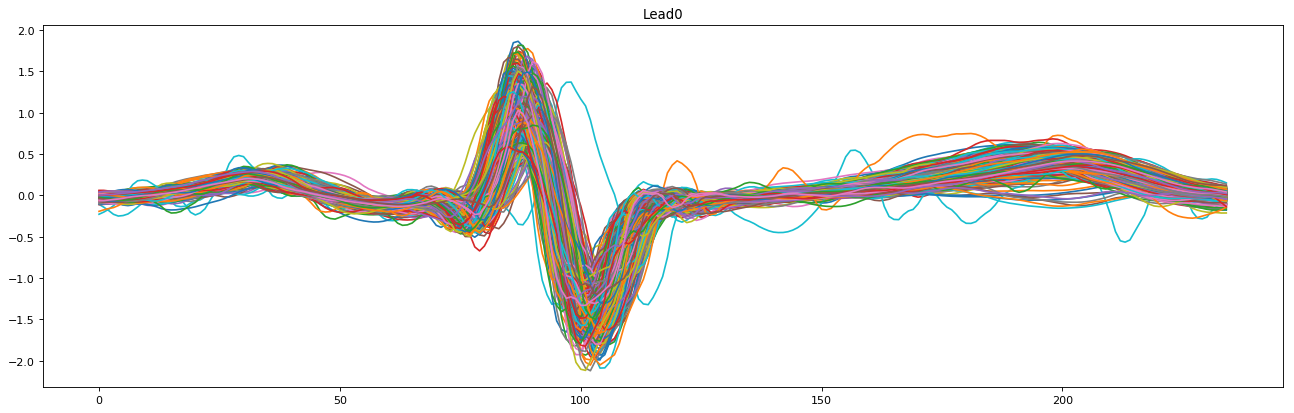

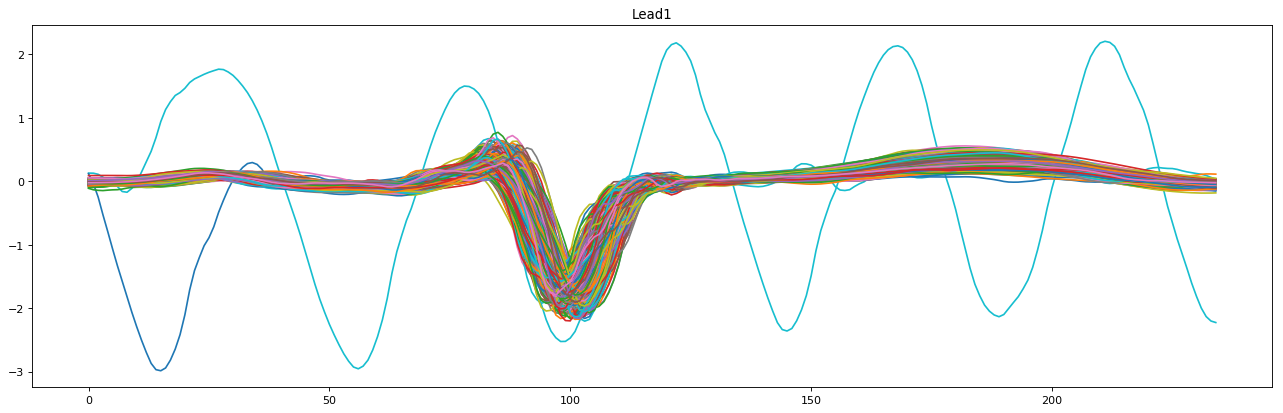

In [25]:
ds = '802'
print('ann: ', set(Hbs[ds]['ann']))
print('Heartbeats amount: ', len(Hbs[ds]))

plt.figure(figsize=(20, 6), dpi=80)
plt.title('Lead0')
for i in range(len(Hbs[ds]) - 1000):
    if Hbs[ds]['ann'][i] in N:
        beat = Hbs[ds]['lead0'][i]
        temp = pd.Series(list(beat))
        plt.plot(temp)
plt.show()

plt.figure(figsize=(20, 6), dpi=80)
plt.title('Lead1')
for i in range(len(Hbs[ds]) - 1000):
    if Hbs[ds]['ann'][i] in N:
        beat = Hbs[ds]['lead1'][i]
        temp = pd.Series(list(beat))
        plt.plot(temp)
plt.show()

ann:  {'V', 'S', 'N'}
Heartbeats amount:  2334


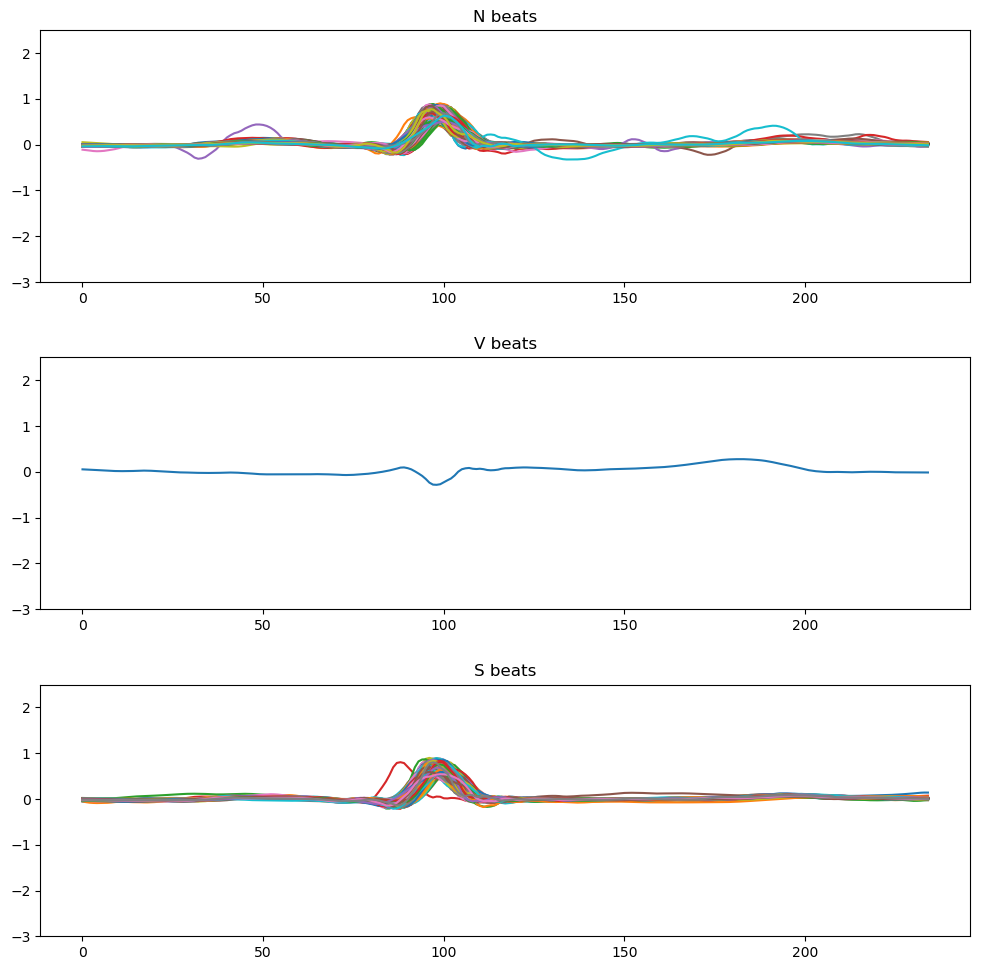

In [32]:
ds = '822'
print('ann: ', set(Hbs[ds]['ann']))
print('Heartbeats amount: ', len(Hbs[ds]))

plt.figure(figsize=(12, 12), dpi=100)
plt.subplots_adjust(wspace =0, hspace =0.3)
p1 = plt.subplot(311)
p1.set_title('N beats')
p1.set_ylim(-3, 2.5)
p2 = plt.subplot(312)
p2.set_title('V beats')
p2.set_ylim(-3, 2.5)
p3 = plt.subplot(313)
p3.set_title('S beats')
p3.set_ylim(-3, 2.5)

for i in range(len(Hbs[ds]) - 1000):
    if Hbs[ds]['ann'][i] in N:
        beat = Hbs[ds]['lead0'][i]
        temp = pd.Series(list(beat))
        p1.plot(temp)
for i in range(len(Hbs[ds])):
    if Hbs[ds]['ann'][i] in VEB:
        beat = Hbs[ds]['lead0'][i]
        temp = pd.Series(list(beat))
        p2.plot(temp)
for i in range(len(Hbs[ds])):
    if Hbs[ds]['ann'][i] in SVEB:
        beat = Hbs[ds]['lead0'][i]
        temp = pd.Series(list(beat))
        p3.plot(temp)
plt.show()

# Computing RR Intervals

In [11]:
for ds in SUP:
    dsLast = len(Hbs[ds]['annIdx']) - 1
    preRR = [np.NAN]
    postRR = [Hbs[ds]['annIdx'][1] - Hbs[ds]['annIdx'][0]]
    for l in range(1, dsLast):
        preRR.append(Hbs[ds]['annIdx'][l] - Hbs[ds]['annIdx'][l-1])
        postRR.append(Hbs[ds]['annIdx'][l+1] - Hbs[ds]['annIdx'][l])
    preRR.append(Hbs[ds]['annIdx'][dsLast] - Hbs[ds]['annIdx'][dsLast-1])
    postRR.append(np.NAN)
    Hbs[ds]['preRR'] = preRR
    Hbs[ds]['postRR'] = postRR

In [12]:
Hbs['801'].head(10)

,ann,annIdx,lead0,lead1,preRR,postRR
0,N,127,37 0.361539 38 0.362331 39 0.35825...,37 0.032312 38 0.028525 39 0.02502...,NaN,185.0
1,V,312,222 -0.935055 223 -0.851771 224 -0.76691...,222 -0.381701 223 -0.353550 224 -0.32232...,185.0,237.0
2,N,549,459 0.051090 460 0.034578 461 0.01473...,459 -0.014701 460 -0.012392 461 -0.00926...,237.0,198.0
3,V,747,657 0.137190 658 0.175909 659 0.21499...,657 -0.233746 658 -0.215173 659 -0.19448...,198.0,240.0
4,N,987,897 -0.013025 898 -0.011139 899 -0.00...,897 0.021501 898 0.020361 899 0.01...,240.0,189.0
5,V,1176,1086 -0.026338 1087 0.027964 1088 0.07...,1086 -0.261736 1087 -0.237540 1088 -0.21...,189.0,238.0
6,N,1414,1324 0.009298 1325 -0.017138 1326 -0.02...,1324 -0.007747 1325 -0.008663 1326 -0.00...,238.0,189.0
7,V,1603,1513 -0.062690 1514 0.001104 1515 0.06...,1513 -0.337005 1514 -0.309591 1515 -0.28...,189.0,238.0
8,N,1841,1751 -0.030690 1752 -0.035435 1753 -0.04...,1751 0.046725 1752 0.041429 1753 0.03...,238.0,170.0
9,V,2011,1921 -1.381479 1922 -1.374591 1923 -1.36...,1921 -0.575295 1922 -0.583054 1923 -0.59...,170.0,242.0


# Skewness and Kurtosis Calculation

In [13]:
for ds in SUP:
    dsLength = len(Hbs[ds]['annIdx'])
    skewness_0 = []
    kurtosis_0 = []
    skewness_1 = []
    kurtosis_1 = []
    for l in range(0, dsLength):
        skewness_0.append(Hbs[ds]['lead0'][l].skew())
        skewness_1.append(Hbs[ds]['lead1'][l].skew())
        kurtosis_0.append(Hbs[ds]['lead0'][l].kurt())
        kurtosis_1.append(Hbs[ds]['lead1'][l].kurt())
    Hbs[ds]['skewness_0'] = skewness_0
    Hbs[ds]['skewness_1'] = skewness_1
    Hbs[ds]['kurtosis_0'] = kurtosis_0
    Hbs[ds]['kurtosis_1'] = kurtosis_1

In [14]:
Hbs['801'].head(10)

,ann,annIdx,lead0,lead1,preRR,postRR,skewness_0,skewness_1,kurtosis_0,kurtosis_1
0,N,127,37 0.361539 38 0.362331 39 0.35825...,37 0.032312 38 0.028525 39 0.02502...,NaN,185.0,-0.539695,1.305906,-0.250367,3.525809
1,V,312,222 -0.935055 223 -0.851771 224 -0.76691...,222 -0.381701 223 -0.353550 224 -0.32232...,185.0,237.0,-2.076431,-2.057856,4.572261,4.053724
2,N,549,459 0.051090 460 0.034578 461 0.01473...,459 -0.014701 460 -0.012392 461 -0.00926...,237.0,198.0,-0.312832,1.629827,-0.591557,3.826654
3,V,747,657 0.137190 658 0.175909 659 0.21499...,657 -0.233746 658 -0.215173 659 -0.19448...,198.0,240.0,-2.162188,-2.119297,4.200840,4.242113
4,N,987,897 -0.013025 898 -0.011139 899 -0.00...,897 0.021501 898 0.020361 899 0.01...,240.0,189.0,-0.076183,1.042514,-0.452287,1.983350
5,V,1176,1086 -0.026338 1087 0.027964 1088 0.07...,1086 -0.261736 1087 -0.237540 1088 -0.21...,189.0,238.0,-1.878730,-2.017199,3.358328,3.699839
6,N,1414,1324 0.009298 1325 -0.017138 1326 -0.02...,1324 -0.007747 1325 -0.008663 1326 -0.00...,238.0,189.0,-0.346967,1.831270,-0.223666,5.718974
7,V,1603,1513 -0.062690 1514 0.001104 1515 0.06...,1513 -0.337005 1514 -0.309591 1515 -0.28...,189.0,238.0,-1.630280,-1.848534,2.041396,3.881556
8,N,1841,1751 -0.030690 1752 -0.035435 1753 -0.04...,1751 0.046725 1752 0.041429 1753 0.03...,238.0,170.0,-0.457038,1.667112,-0.649625,4.495829
9,V,2011,1921 -1.381479 1922 -1.374591 1923 -1.36...,1921 -0.575295 1922 -0.583054 1923 -0.59...,170.0,242.0,0.046710,-1.164481,-0.876181,1.303593


# DWT-based Features

In [15]:
wavelet = pywt.Wavelet('haar')
for ds in SUP:
    dsLength = len(Hbs[ds]['annIdx'])
    cA7_lead0 = []
    cD7_lead0 = []
    cD6_lead0 = []
    cD5_lead0 = []
    cD4_lead0 = []
    cD3_lead0 = []
    cD2_lead0 = []
    cD1_lead0 = []
    
    cA7_lead1 = []
    cD7_lead1 = []
    cD6_lead1 = []
    cD5_lead1 = []
    cD4_lead1 = []
    cD3_lead1 = []
    cD2_lead1 = []
    cD1_lead1 = []
    
    for l in range(0, dsLength):
        beat = list(Hbs[ds]['lead0'][l])
        coffs = pywt.wavedec(beat, wavelet, mode='symmetric', level=7)
        cA7_lead0.append(list(coffs[0]))
        cD7_lead0.append(list(coffs[1]))
        cD6_lead0.append(list(coffs[2]))
        cD5_lead0.append(list(coffs[3]))
        cD4_lead0.append(list(coffs[4]))
        cD3_lead0.append(list(coffs[5]))
        cD2_lead0.append(list(coffs[6]))
        cD1_lead0.append(list(coffs[7]))
        
        beat = list(Hbs[ds]['lead1'][l])
        coffs = pywt.wavedec(beat, wavelet, mode='symmetric', level=7)
        cA7_lead1.append(list(coffs[0]))
        cD7_lead1.append(list(coffs[1]))
        cD6_lead1.append(list(coffs[2]))
        cD5_lead1.append(list(coffs[3]))
        cD4_lead1.append(list(coffs[4]))
        cD3_lead1.append(list(coffs[5]))
        cD2_lead1.append(list(coffs[6]))
        cD1_lead1.append(list(coffs[7]))
    
    Hbs[ds]['cA7_0'] = cA7_lead0
    Hbs[ds]['cD7_0'] = cD7_lead0
    Hbs[ds]['cD6_0'] = cD6_lead0
    Hbs[ds]['cD5_0'] = cD5_lead0
    Hbs[ds]['cD4_0'] = cD4_lead0
    Hbs[ds]['cD3_0'] = cD3_lead0
    Hbs[ds]['cD2_0'] = cD2_lead0
    Hbs[ds]['cD1_0'] = cD1_lead0
    
    Hbs[ds]['cA7_1'] = cA7_lead1
    Hbs[ds]['cD7_1'] = cD7_lead1
    Hbs[ds]['cD6_1'] = cD6_lead1
    Hbs[ds]['cD5_1'] = cD5_lead1
    Hbs[ds]['cD4_1'] = cD4_lead1
    Hbs[ds]['cD3_1'] = cD3_lead1
    Hbs[ds]['cD2_1'] = cD2_lead1
    Hbs[ds]['cD1_1'] = cD1_lead1

In [16]:
Hbs['801'].head(1)

,ann,annIdx,lead0,lead1,preRR,postRR,skewness_0,skewness_1,kurtosis_0,kurtosis_1,...,cD2_0,cD1_0,cA7_1,cD7_1,cD6_1,cD5_1,cD4_1,cD3_1,cD2_1,cD1_1
0,N,127,37 0.361539 38 0.362331 39 0.35825...,37 0.032312 38 0.028525 39 0.02502...,NaN,185.0,-0.539695,1.305906,-0.250367,3.525809,...,"[0.0069007642819, 0.0194273757524, 0.031725547...","[-0.000560324247145, 0.0045583196439, 0.006890...","[1.45903917095, -0.728210423591]","[-1.20174263118, -3.27072254954]","[-0.143134266665, -1.98919254097, 0.8075288287...","[0.0281229339747, 0.580144327987, -0.077017156...","[0.0452404006758, -0.107835926626, 0.261707996...","[0.0164774489578, 0.0170598295487, 0.019370206...","[0.00692247453788, 0.0055550972899, 0.00565595...","[0.00267740180586, 0.00216274261211, 0.0019188..."


In [17]:
list(Hbs['801'].columns.values)

['ann',
 'annIdx',
 'lead0',
 'lead1',
 'preRR',
 'postRR',
 'skewness_0',
 'skewness_1',
 'kurtosis_0',
 'kurtosis_1',
 'cA7_0',
 'cD7_0',
 'cD6_0',
 'cD5_0',
 'cD4_0',
 'cD3_0',
 'cD2_0',
 'cD1_0',
 'cA7_1',
 'cD7_1',
 'cD6_1',
 'cD5_1',
 'cD4_1',
 'cD3_1',
 'cD2_1',
 'cD1_1']

# 把lead0和lead1分成2个数据集

In [18]:
Hbs_lead0 = {}
Hbs_lead1 = {}

for ds in SUP:
    Hbs_lead0[ds] = pd.DataFrame({
        'ann': Hbs[ds]['ann'],
        'annIdx': Hbs[ds]['annIdx'],
        'beat': Hbs[ds]['lead0'],
        'preRR': Hbs[ds]['preRR'],
        'postRR': Hbs[ds]['postRR'],
        'skewness': Hbs[ds]['skewness_0'],
        'kurtosis': Hbs[ds]['kurtosis_0'],
        'cA7': Hbs[ds]['cA7_0'],
        'cD7': Hbs[ds]['cD7_0'],
        'cD6': Hbs[ds]['cD6_0'],
        'cD5': Hbs[ds]['cD5_0'],
        'cD4': Hbs[ds]['cD4_0'],
        'cD3': Hbs[ds]['cD3_0'],
        'cD2': Hbs[ds]['cD2_0'],
        'cD1': Hbs[ds]['cD1_0'],
    })
    
    Hbs_lead1[ds] = pd.DataFrame({
        'ann': Hbs[ds]['ann'],
        'annIdx': Hbs[ds]['annIdx'],
        'beat': Hbs[ds]['lead1'],
        'preRR': Hbs[ds]['preRR'],
        'postRR': Hbs[ds]['postRR'],
        'skewness': Hbs[ds]['skewness_1'],
        'kurtosis': Hbs[ds]['kurtosis_1'],
        'cA7': Hbs[ds]['cA7_1'],
        'cD7': Hbs[ds]['cD7_1'],
        'cD6': Hbs[ds]['cD6_1'],
        'cD5': Hbs[ds]['cD5_1'],
        'cD4': Hbs[ds]['cD4_1'],
        'cD3': Hbs[ds]['cD3_1'],
        'cD2': Hbs[ds]['cD2_1'],
        'cD1': Hbs[ds]['cD1_1'],
    })

In [19]:
Hbs_lead0['801'].head(1)

,ann,annIdx,beat,cA7,cD1,cD2,cD3,cD4,cD5,cD6,cD7,kurtosis,postRR,preRR,skewness
0,N,127,37 0.361539 38 0.362331 39 0.35825...,"[1.28520367743, -5.73617656157]","[-0.000560324247145, 0.0045583196439, 0.006890...","[0.0069007642819, 0.0194273757524, 0.031725547...","[0.0449876800595, 0.108325283047, 0.0623199357...","[0.212883037288, -0.0344081849575, 0.167407130...","[0.558637497311, 0.437966989732, -0.8883579367...","[0.282905758522, -0.455162472064, 0.7599852814...","[0.471148774051, -8.64540904226]",-0.250367,185.0,NaN,-0.539695


# Save Extracted Feature to CSV

In [ ]:
# 为了处理 beat（series类型）无法正确存在csv里的情况
for ds in SUP:
    beatValues = []
    beatIndexs = []
    for i in range(len(Hbs_lead0[ds]['beat'])):
        beatValues.append(list(Hbs_lead0[ds]['beat'][i].values))
        beatIndexs.append(list(Hbs_lead0[ds]['beat'][i].index))
    Hbs_lead0[ds]['beatValues'] = beatValues
    Hbs_lead0[ds]['beatIndex'] = beatIndexs
    
    beatValues = []
    beatIndexs = []
    for i in range(len(Hbs_lead1[ds]['beat'])):
        beatValues.append(list(Hbs_lead1[ds]['beat'][i].values))
        beatIndexs.append(list(Hbs_lead1[ds]['beat'][i].index))
    Hbs_lead1[ds]['beatValues'] = beatValues
    Hbs_lead1[ds]['beatIndex'] = beatIndexs

In [ ]:
Hbs_lead0['851'].head(1)

In [ ]:
for ds in SUP:
    Hbs_lead0[ds].to_csv('Extracted Features/SUP/' + ds + '_lead0.csv', index=False)
    Hbs_lead1[ds].to_csv('Extracted Features/SUP/' + ds + '_lead1.csv', index=False)

In [ ]:
testReadData = pd.read_csv('Extracted Features/SUP/' + '851' + '_lead0.csv')
testReadData.head(1)

# Experiment - Clustering

检查各个心跳类别在RR Interval特征上的分布情况

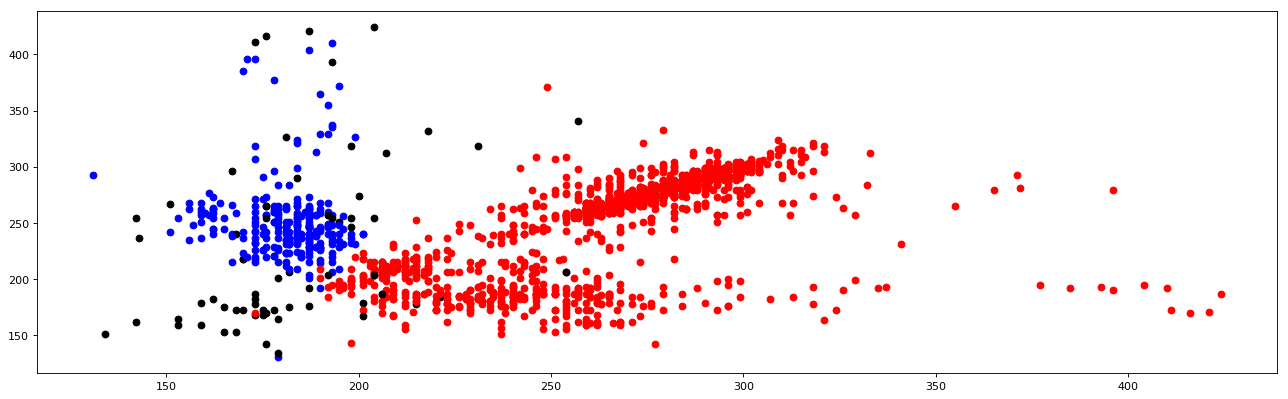

In [20]:
ds = '801'
mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']

featureCols = []
beatIdxs = []
for i in range(1, len(Hbs[ds]['ann'])-1):
    if Hbs[ds]['preRR'][i] > 1000 or Hbs[ds]['postRR'][i] > 1000:
        continue
    featureCols.append([Hbs[ds]['preRR'][i], Hbs[ds]['postRR'][i]])
    beatIdxs.append(i)
    
plt.figure(figsize=(20, 6), dpi=80)
for i, features in enumerate(featureCols):
    color = 'dg'
    if Hbs[ds]['ann'][beatIdxs[i]] in N:
        color = mark[0]
    elif Hbs[ds]['ann'][beatIdxs[i]] in VEB:
        color = mark[1]
    elif Hbs[ds]['ann'][beatIdxs[i]] in SVEB:
        color = mark[3]
    plt.plot(features[0], features[1], color)
plt.show()

检查各个心跳类别在skewness和kurtosis特征上的分布情况

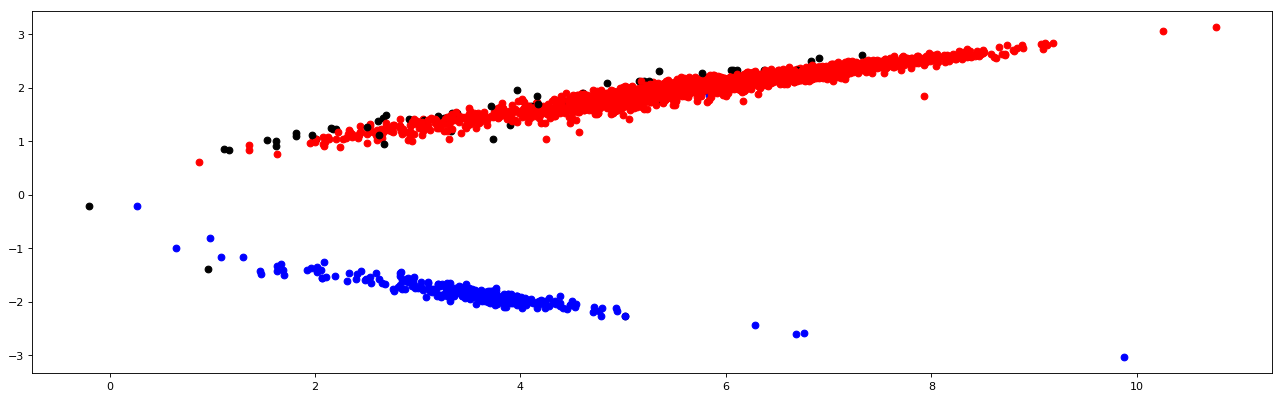

In [21]:
dsCol = ['801']
mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']

featureCols = {}
beatIdxs = {}
for ds in dsCol:
    featureCols[ds] = []
    beatIdxs[ds] = []
    for i in range(1, len(Hbs[ds]['ann'])-1):
        featureCols[ds].append([Hbs[ds]['kurtosis_1'][i], Hbs[ds]['skewness_1'][i]])
        beatIdxs[ds].append(i)
    
plt.figure(figsize=(20, 6), dpi=80)
for ds in dsCol:
    for i, features in enumerate(featureCols[ds]):
        color = 'dg'
        if Hbs[ds]['ann'][beatIdxs[ds][i]] in N:
            color = mark[0]  # 红色圆点
        elif Hbs[ds]['ann'][beatIdxs[ds][i]] in VEB:
            color = mark[1]  # 蓝色圆点
        elif Hbs[ds]['ann'][beatIdxs[ds][i]] in SVEB:
            color = mark[3] # 黑色圆点
        plt.plot(features[0], features[1], color)
plt.show()

### 综上所述，RR Interval对S类周期异常的分类效果比较明显，skewness和kurtosis对V型异常分类效果比较明显

检查各个心跳类别在小波系数特征上的分布情况

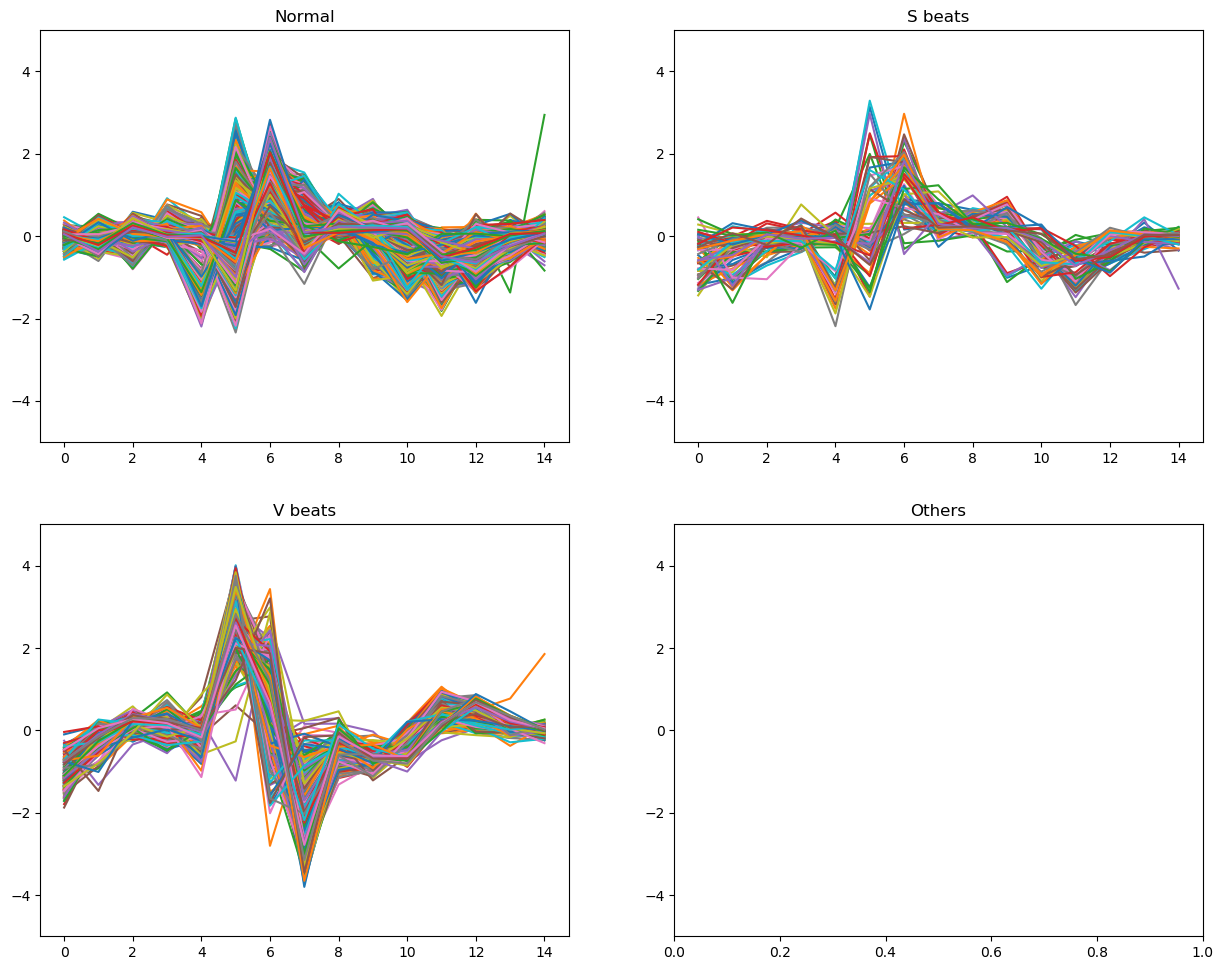

In [22]:
ds = '801'

featureCols = list(Hbs[ds]['cD4_0'])

plt.figure(figsize=(15, 12), dpi=100)
p1 = plt.subplot(221)
p1.set_title('Normal')
p1.set_ylim(-5,5)
p2 = plt.subplot(222)
p2.set_title('S beats')
p2.set_ylim(-5,5)
p3 = plt.subplot(223)
p3.set_title('V beats')
p3.set_ylim(-5,5)
p4 = plt.subplot(224)
p4.set_title('Others')
p4.set_ylim(-5,5)

for i, feature in enumerate(featureCols):
    if Hbs[ds]['ann'][i] in N:
        p1.plot(featureCols[i])
    elif Hbs[ds]['ann'][i] in SVEB:
        p2.plot(featureCols[i])
    elif Hbs[ds]['ann'][i] in VEB:
        p3.plot(featureCols[i])
    else:
        p4.plot(featureCols[i])

plt.show()